<IPython.core.display.Javascript object>


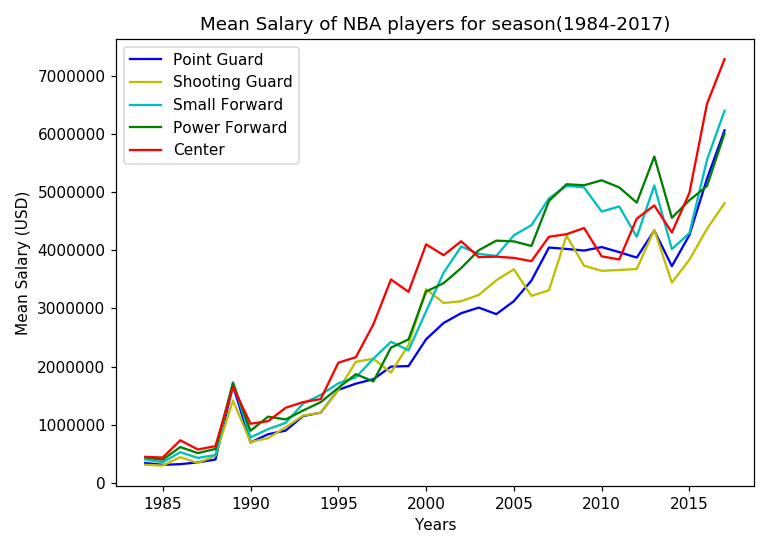

<IPython.core.display.Javascript object>


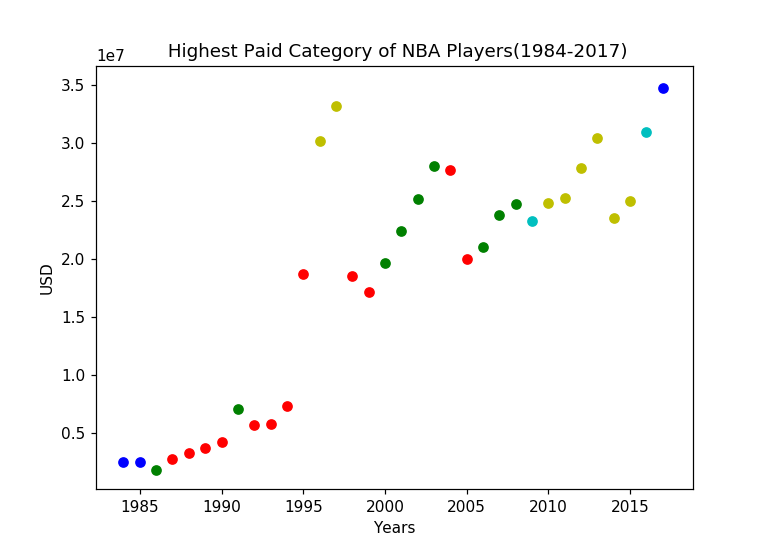

<IPython.core.display.Javascript object>


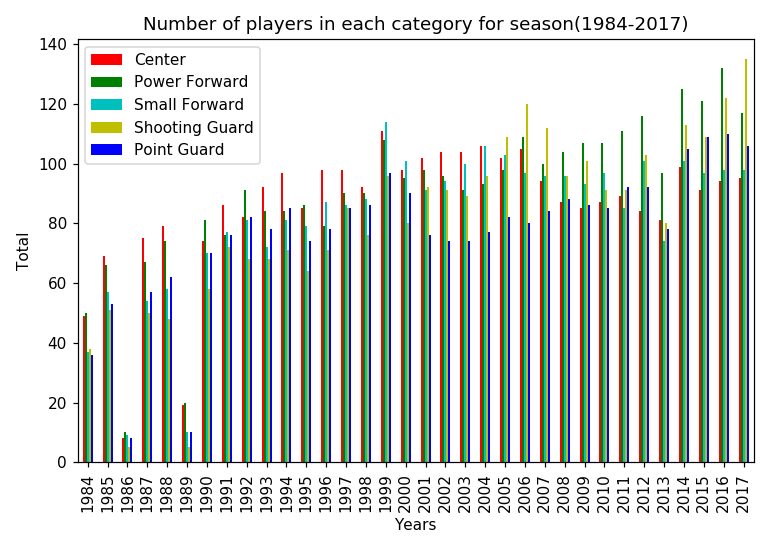

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
%matplotlib notebook

# Reading all the player information
players =pd.read_csv('players.csv')
players = players[['_id','name','position']]

# Reading all Team information
team = pd.read_csv('salaries_1985to2018.csv')
team = team[['player_id','salary','season_start','team']]

# Merging both the dataframes in order to link the player name position and salary in one frame
merge1 = pd.merge(players,team,how ='inner',left_on = '_id',right_on ='player_id')
merge1=merge1[['name','position','salary','season_start','team']]
merge1.replace(to_replace =['Center and Power Forward','Center and Power Forward and Small Forward','Center and Power Forward and Small Forward','Center and Small Forward and Power Forward'],value ='Center',inplace =True)
merge1.replace(to_replace =['Point Guard','Point Guard and Power Forward and Small Forward and Shooting Guard','Point Guard and Shooting Guard','Point Guard and Shooting Guard and Small Forward','Point Guard and Small Forward','Point Guard and Small Forward and Shooting Guard'],value ='Point Guard',inplace =True)
merge1.replace(to_replace =['Power Forward','Power Forward and Center','Power Forward and Center and Small Forward','Power Forward and Shooting Guard','Power Forward and Shooting Guard and Small Forward','Power Forward and Small Forward','Power Forward and Small Forward and Center','Power Forward and Small Forward and Shooting Guard'],value ='Power Forward',inplace =True)   
merge1.replace(to_replace =['Shooting Guard','Shooting Guard and Point Guard','Shooting Guard and Point Guard and Small Forward','Shooting Guard and Power Forward and Point Guard','Shooting Guard and Power Forward and Small Forward','Shooting Guard and Small Forward','Shooting Guard and Small Forward and Point Guard','Shooting Guard and Small Forward and Power Forward'], value ='Shooting Guard',inplace =True)
merge1.replace(to_replace =['Small Forward','Small Forward and Center','Small Forward and Center and Power Forward','Small Forward and Point Guard and Shooting Guard','Small Forward and Power Forward','Small Forward and Power Forward and Center','Small Forward and Power Forward and Shooting Guard','Small Forward and Shooting Guard','Small Forward and Shooting Guard and Point Guard','Small Forward and Shooting Guard and Power Forward'], value ='Small Forward',inplace =True)  

# Setting name to index and making critical changes to important player positions
merge1 = merge1.set_index('name')

# POSITION CHANGES
merge1.loc['Tim Duncan','position']='Power Forward'
merge1.loc['Jason Kidd','position']='Point Guard'
merge1.loc['Giannis Antetokounmpo','position']='Small Forward'
merge1.loc['Dwyane Wade','position'] = 'Shooting Guard'
merge1.loc['Charles Barkley','position'] = 'Power Forward'
merge1.loc['Kevin Durant','position'] = 'Small Forward'
merge1.loc['Alonzo Mourning','position'] = 'Center'
merge1.loc['Paul Pierce','position'] = 'Small Forward'
merge1.loc['Tracy McGrady','position'] = 'Small Forward'
merge1.loc['Magic Johnson','position']='Point Guard'
merge1.loc['Patrick Ewing','position']='Center'
merge1.loc['Michael Jordan','position']='Shooting Guard'
merge1.loc['Kevin Garnett','position']='Power Forward'
merge1.loc['LeBron James','position']='Small Forward'
merge1.loc['Tristan Thompson','position']='Center'
merge1.loc['Draymond Green','position']='Power Forward'
merge1.loc['Derrick Favors','position']='Center'
merge1.loc['Marcus Morris','position']='Power Forward'
merge1.loc['Larry Nance Jr.','position']='Power Forward'
merge1.loc['John Henson','position']='Power Forward'
merge1.loc['Ed Davis','position']='Power Forward'
#merge1.head()


# Reseting Index again ang grouping by season start
# PART1 :  Retrieving mean salary information seperately in all 5 cases(PG,SG,SF,PF,Center)
#          also getting the number of players w.r.t each category in each season
# PART2 :# Creating a scatter plot of all the top earned players in years 1984-2017
#          Lets group again and calculate top earned players and plot what category they belong to

merge1.reset_index(inplace =True)
ss = merge1.groupby(['season_start']) 
# x index
years=[]
# Mean Salary
mean_center=[]
mean_pg =[]
mean_pf=[]
mean_sg=[]
mean_sf=[]
# Nos of Players
pg_len=[]
sg_len=[]
sf_len=[]
pf_len=[]
center_len=[]
#Most earned
name_max=[]
pos_max =[]
sal_max =[]

for i,v in ss:
    years.append(i)
    v = v.reset_index().drop(['index'],axis =1)
    # Position
    pg = v[v.position =='Point Guard']
    sg = v[v.position =='Shooting Guard']
    sf = v[v.position =='Small Forward']
    pf = v[v.position =='Power Forward']
    center = v[v.position =='Center']
    # Length
    pg_len.append(len(pg))
    sg_len.append(len(sg))
    sf_len.append(len(sf))
    pf_len.append(len(pf))
    center_len.append(len(center))
    # Mean
    mean_center.append(center.salary.mean())
    mean_pg.append(pg.salary.mean())
    mean_pf.append(pf.salary.mean())
    mean_sg.append(sg.salary.mean())
    mean_sf.append(sf.salary.mean())
    # Most earned Player
    maxi = v.salary.idxmax(axis =1)
    name_max.append(v.iloc[maxi]['name'])
    pos_max.append(v.iloc[maxi]['position'])
    sal_max.append(v.iloc[maxi]['salary'])
# Creating a dataframe for scatter plot info    
data = {'Name':name_max, 'Position':pos_max,'Salary':sal_max,'Years':years} 
scat =pd.DataFrame(data)    
# Creating a color column for the dataframe w.r.t each category
color =[]
for i in range(len(scat)):
    if scat.iloc[i].Position == 'Point Guard':
        color.append('b')
    elif scat.iloc[i].Position == 'Shooting Guard':
        color.append('y')
    elif scat.iloc[i].Position == 'Small Forward':
        color.append('c')
    elif scat.iloc[i].Position == 'Power Forward':
        color.append('g')
    elif scat.iloc[i].Position == 'Center':
        color.append('r')
scat['color'] =color 
# scat.head(50)

# PLOTTING
# PART 1 - Line plots
plt.figure(figsize =(7,5))

plt.plot(years,mean_pg ,color ='b',label='Point Guard')
plt.plot(years,mean_sg,color ='y',label='Shooting Guard')
plt.plot(years,mean_sf,color ='c',label='Small Forward')
plt.plot(years,mean_pf,color ='g',label='Power Forward')
plt.plot(years,mean_center,color ='r',label='Center')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary of NBA players for season(1984-2017)')
plt.tight_layout()
plt.savefig('Fig1')
# PART 2 -Scatter plot
plt.figure(figsize =(7,5))
colors = itertools.cycle(scat.color)
for y in range(len(scat)):
    plt.scatter(scat.iloc[y].Years,scat.iloc[y].Salary, color=next(colors))
plt.title(' Highest Paid Category of NBA Players(1984-2017)')
plt.xlabel('Years')
plt.ylabel('USD')
plt.savefig('Fig2')
# PART 3 -Bar plot

df=pd.DataFrame({'Center':center_len, 'Power Forward':pf_len, 'Small Forward':sf_len,'Shooting Guard':sg_len,'Point Guard':pg_len},index =years)
df.plot(kind='bar',color =['r','g','c','y','b'],figsize =(7,5))
plt.title('Number of players in each category for season(1984-2017)')
plt.xlabel('Years')
plt.ylabel('Total')
plt.savefig('Fig3')
plt.tight_layout()